# Contraction des longueurs

## Introduction

Dans la vidéo [Voyage relativiste](https://www.youtube.com/watch?v=1jKPtu5m3DQ), un aperçu de ce qu'on peut appeler la **dilatation du temps** était présenté. Dans cette vidéo, la représentation du **temps propre** le long de la **ligne d'univers** illustre bien ce phénomène.

La notion de **compression des longueurs** est un peu plus compliquée à illustrer. Préalablement, on peut regarder la vidéo [Simultaneïté](https://www.youtube.com/watch?v=jib6EababqA) qui expose une façon simple de représenter des **évènements** dans l'espace-temps, grâce à des coordonnées $(x,t)$ réduites. Pour simplifier, on envisage toujours une position le long d'une droite, avec une distance $x$ et un temps $t$.

## Description

Un vaisseau se déplace le long d'un axe à la vitesse $v$ dans le référentiel fixe. On place un **point d'observation fixe** à la distance $x$. En ce point, on mesure l'intervalle de temps $\Delta t$ entre le passage de l'avant du vaisseau à l'instant $t$ et le passage de l'arrière.

Il faut donc considérer les deux évènements $(x,t)$ et $(x,t+\Delta t)$ pour étudier ce qui se passe dans le référentiel du vaisseau.

Si on considère des écarts $\Delta x$ et $\Delta t$ entre deux évènements dans le référentiel fixe, les écarts correspondants $\Delta x'$ et $\Delta t'$ dans le référentiel du vaisseau sont :

$$\Delta x'= \gamma\left(\Delta x-v\Delta t\right)$$
$$\Delta t'= \gamma\left(\Delta t-v\Delta x\right)$$

avec

$$\gamma=\dfrac{1}{\sqrt{1-v^2}}$$

Pour le point d'observation fixe, $\Delta x=0$, de sorte que :

$$\Delta x'= -\gamma v\Delta t$$
$$\Delta t'= \gamma\Delta t$$

Dans le référentiel fixe, on peut évaluer la **longueur apparente** $L$ du vaisseau à partir de la vitesse $v$ et de l'intervalle de temps $\Delta t$ mesuré :

$$L=v\Delta t$$

Dans le référentiel du vaisseau, le point de mesure se déplace à la vitesse $-v$ et parcours une distance $\Delta x'$ pendant un temps $\Delta t'$. On accède ainsi à la **longueur vraie** $L'$ du vaisseau :

$$\Delta x'= -L'=-v\Delta t'=-\gamma v\Delta t=-\gamma L$$

Avec $\gamma > 1$, on obtient ainsi une longueur apparente $L$ plus petite que la longueur vraie $L'$ :

$$L=\dfrac{L'}{\gamma}$$

Dans la représentation graphique proposée, on représente un quadrillage avec des mailles de côté $1$ pour les évènements $(x,t)$ dans le référentiel fixe et pour les évènements $(x',t')$ dans le référentiel du vaisseau. L'unité de temps est celle que l'on souhaite et elle impose l'unité de longueur qui est la distance parcourue par la lumière pendant cette unité de temps. On choisit la position $x$ du point de mesure et les deux instants $t_d$ et $t_f$ où on voit passer l'avant puis l'arrière du vaisseau.

## Le programme **cdl.py**

In [47]:
import numpy as np
import matplotlib.pyplot as plt


def trf(x, t, v):
    g = 1/np.sqrt(1-v**2)
    return g*(x-v*t), g*(t-v*x)


def trace_lu(v=0.6, x=9, td=7, tf=11):
    N = 10
    event_x = np.array([x, x])
    event_t = np.array([td, tf])
    x = np.linspace(0, N, N+1)
    t = np.linspace(0, N, N+1)
    plt.figure(figsize=(8, 8))
    for n in range(N+1):
        plt.plot(*trf(np.array([x[n], x[n]]),
                 np.array([0, t[-1]]), -v), 'b', lw=0.25)
    for n in range(N+1):
        plt.plot(*trf(np.array([0, x[-1]]),
                 np.array([t[n], t[n]]), -v), 'b', lw=0.25)
    xo, to = trf(event_x, event_t, v)
    plt.plot(event_x, event_t, 'r', lw=1.5,
             label=f'$\Delta t=${event_t[1]-event_t[0]:.4f}')
    plt.plot(*trf(xo, np.array([0, 0]), -v), 'k',
             lw=1, label=f'$\Delta x\'=${xo[1]-xo[0]:.4f}')
    plt.plot(*trf(np.array([0, 0]), to, -v), 'g', lw=1,
             label=f'$\Delta t\'=${to[1]-to[0]:.4f}')

    plt.grid('on')
    MAX = trf(N, N, -v)[0]
    plt.xticks(np.arange(0, MAX+1, 1))
    plt.yticks(np.arange(0, MAX+1, 1))
    plt.xlabel('$x$')
    plt.ylabel('$t$')
    plt.axis('equal')
    plt.title(f'$v=${v:.4f}, $\gamma=${1/np.sqrt(1-v**2):.4f}')
    plt.legend()
    print('\n***Résultats***')
    print(f'L ={v*(event_t[1]-event_t[0]):.4f}')
    print(f'L\'={xo[0]-xo[1]:.4f}')
    print('\n***Tracé***')
    plt.show()


## Les tracés

In [48]:
trace_lu(v=0.6,x=9,td=7,tf=11)


***Résultats***
L =2.4000
L'=3.0000

***Tracé***



***Résultats***
L =2.4000
L'=4.0000

***Tracé***


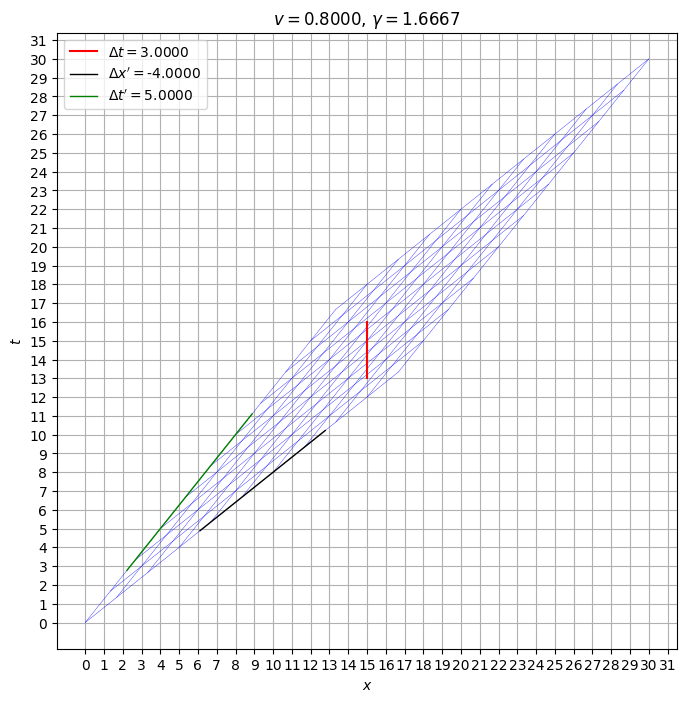

In [49]:
trace_lu(v=0.8,x=15,td=13,tf=16)


***Résultats***
L =2.0000
L'=2.1822

***Tracé***


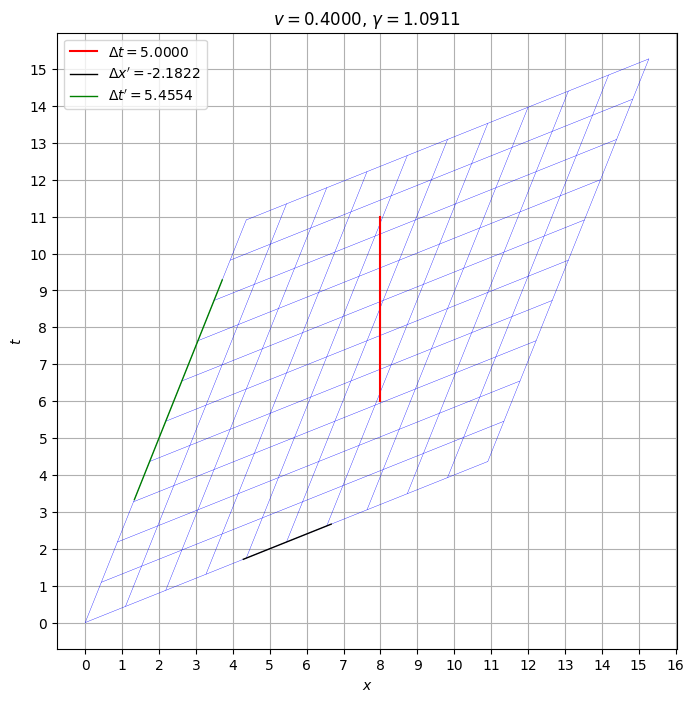

In [50]:
trace_lu(v=0.4,x=8,td=6,tf=11)